In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_df = pd.read_csv('Airline Satisfaction Train.csv')
print(train_df.columns)
test_df = pd.read_csv('Airline Satisfaction Test.csv')

df = pd.concat([train_df, test_df], axis=0)

df.head()

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 non

In [6]:
satisfaction_features = [x for x in df.iloc[:, 7:21]]
print(satisfaction_features)

['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [7]:
df_num = df.copy()

In [8]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [9]:
gender_mapping = {'Male': 0 , 'Female': 1}
df_num['Gender'] = df_num['Gender'].map(gender_mapping)

In [10]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [11]:
customer_type_mapping = {'Loyal Customer': 0, 'disloyal Customer': 1}

df_num['Customer Type'] = df_num['Customer Type'].map(customer_type_mapping)

In [12]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [13]:
Personal_Travel_mapping = {'Business travel': 0 , 'Personal Travel': 1}
df_num['Type of Travel'] = df_num['Type of Travel'].map(Personal_Travel_mapping)

In [14]:
df_num['Class'].value_counts()

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

In [15]:
class_mapping = {'Business': 0, 'Eco': 1, 'Eco Plus':2}
df_num['Class'] = df_num['Class'].map(class_mapping)

In [16]:
df_num['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64

In [17]:
satisfaction_mapping = {'neutral or dissatisfied': 0 , 'satisfied': 1}
df_num['satisfaction'] = df['satisfaction'].map(satisfaction_mapping)

In [18]:
df_num.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [19]:
missing_value_df = df[(df['Arrival Delay in Minutes'].isnull())]

In [20]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [21]:
knn_imputer = KNNImputer(n_neighbors = 2)
df_num = pd.DataFrame(knn_imputer.fit_transform(df_num), columns=df.columns)


In [22]:
df_num

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172.0,0.0,0.0,13.0,1.0,2.0,460.0,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,18.0,0.0
1,5047.0,0.0,1.0,25.0,0.0,0.0,235.0,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,6.0,0.0
2,110028.0,1.0,0.0,26.0,0.0,0.0,1142.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,0.0,1.0
3,24026.0,1.0,0.0,25.0,0.0,0.0,562.0,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,9.0,0.0
4,119299.0,0.0,0.0,61.0,0.0,0.0,214.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463.0,0.0,1.0,34.0,0.0,0.0,526.0,3.0,3.0,3.0,...,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0,0.0
129876,71167.0,0.0,0.0,23.0,0.0,0.0,646.0,4.0,4.0,4.0,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,0.0,1.0
129877,37675.0,1.0,0.0,17.0,1.0,1.0,828.0,2.0,5.0,1.0,...,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0,0.0
129878,90086.0,0.0,0.0,14.0,0.0,0.0,1127.0,3.0,3.0,3.0,...,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,0.0,1.0


In [23]:
df_num.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [24]:
df['Arrival Delay in Minutes'] = df_num['Arrival Delay in Minutes']

In [25]:
df.drop('id', axis = 1, inplace = True)
df_num.drop('id', axis =1 , inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

Gender
Female    65899
Male      63981
Name: count, dtype: int64


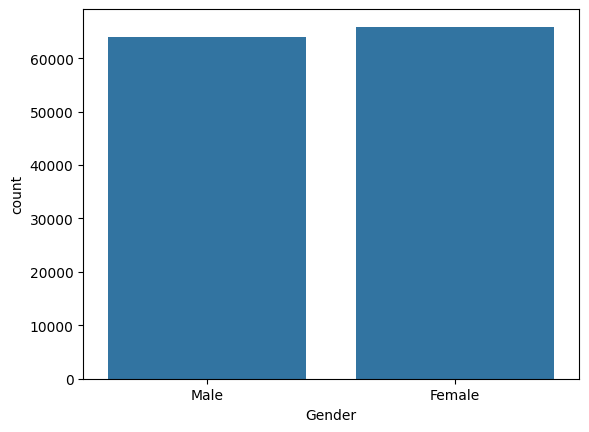

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64


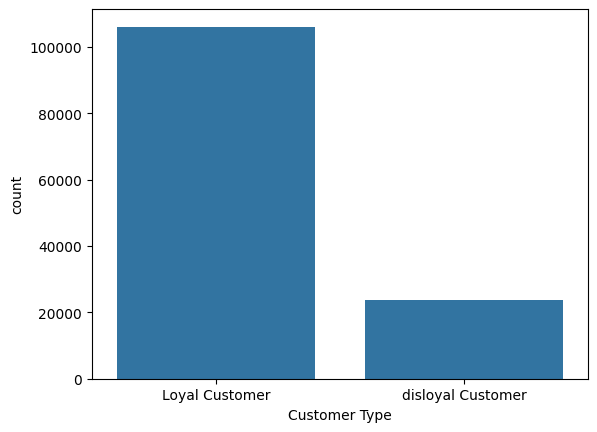

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64


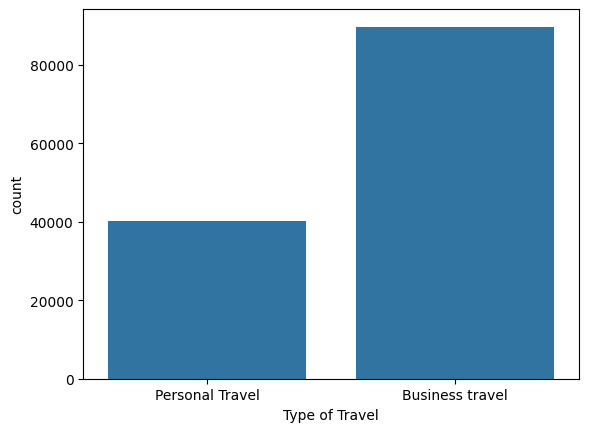

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64


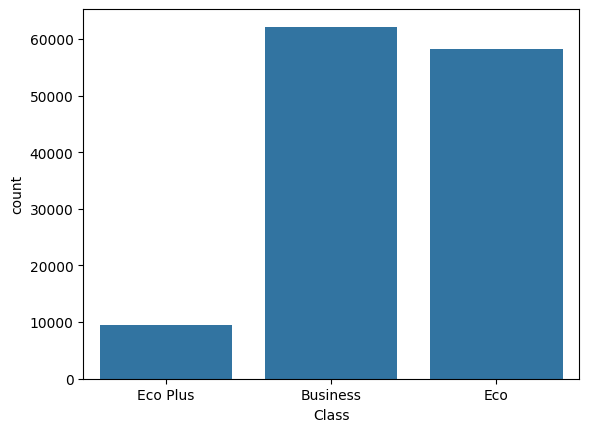

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64


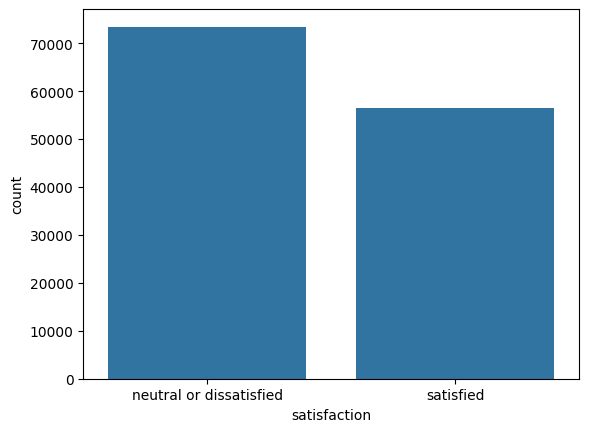

In [27]:
for i in df.select_dtypes(include = 'object').columns: 
    sns.countplot(data = df, x = f'{i}')
    print(df[i].value_counts())
    plt.show()

satisfaction
neutral or dissatisfied    16.406837
satisfied                  12.509782
Name: Departure Delay in Minutes, dtype: float64


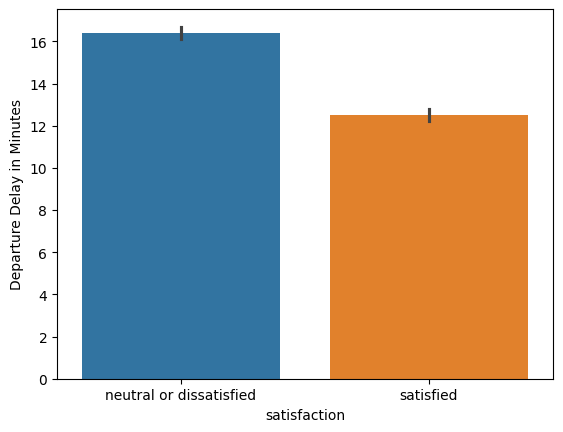

satisfaction
neutral or dissatisfied    16.733397
satisfied                  13.221760
Name: Arrival Delay in Minutes, dtype: float64


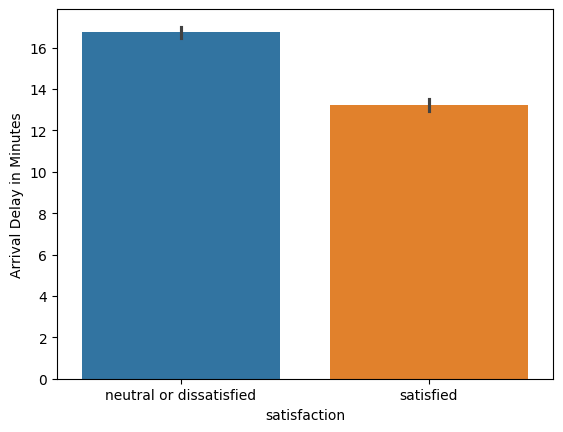

In [28]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float64')

for col in df.select_dtypes(include='float64').columns:
    sns.barplot(data = df, x = 'satisfaction', hue = 'satisfaction', y = col)
    print(df.groupby('satisfaction')[col].mean())
    plt.show()

In [29]:
df.select_dtypes(include='int64').columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

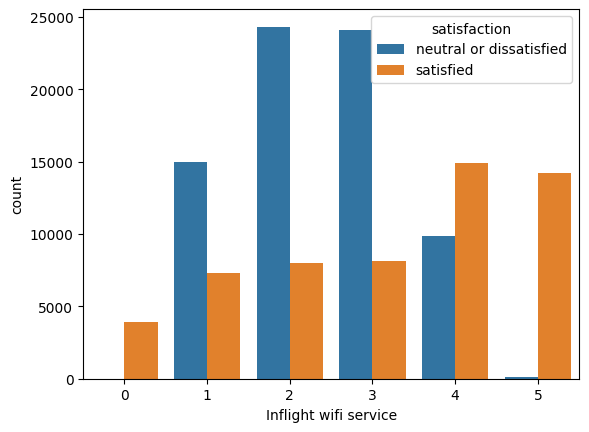

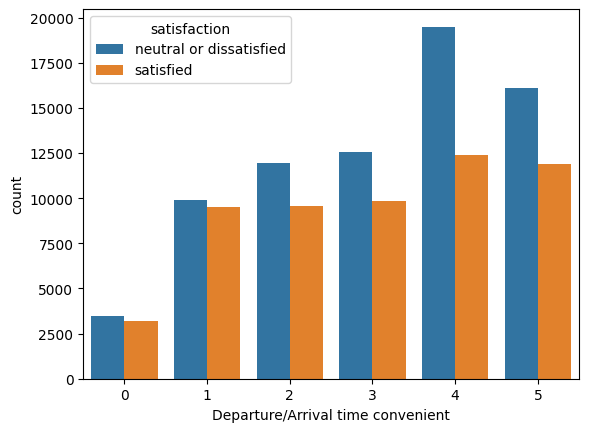

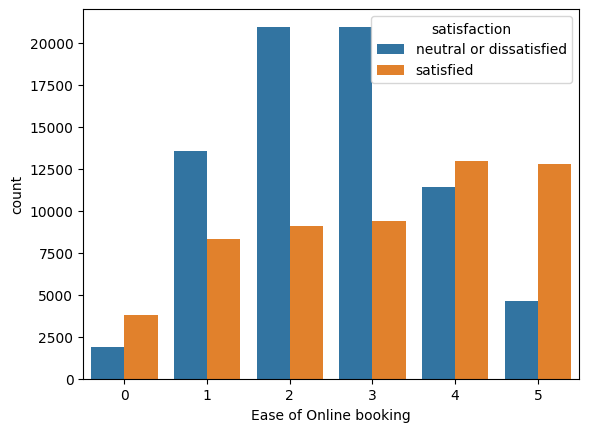

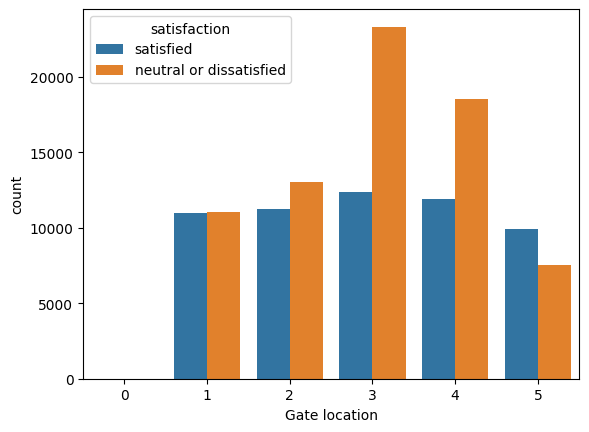

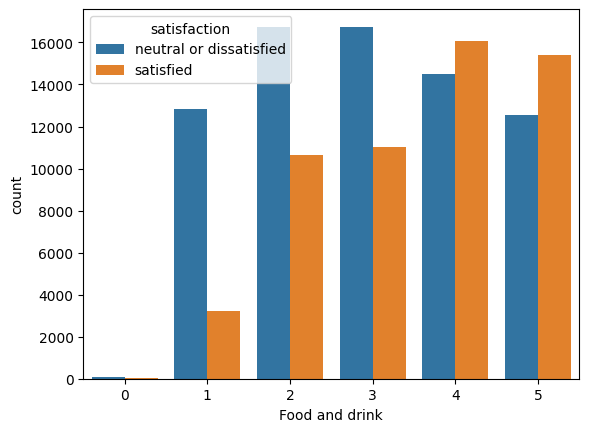

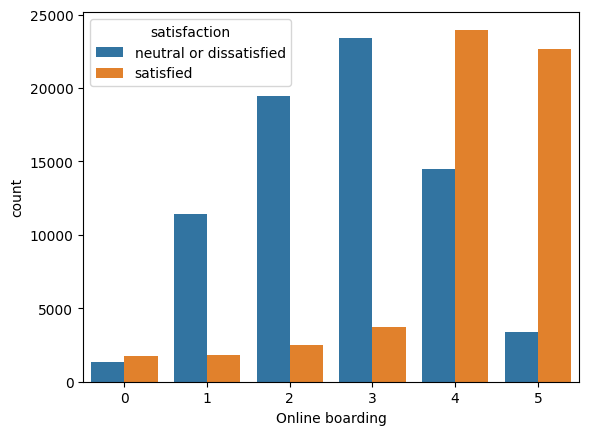

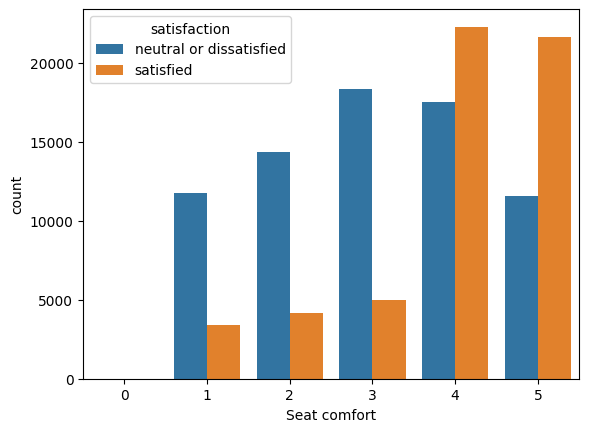

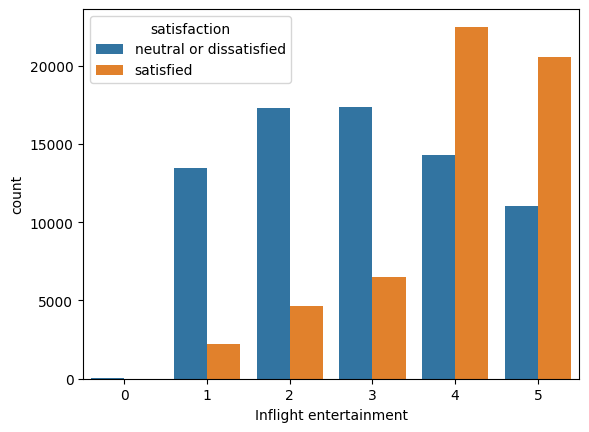

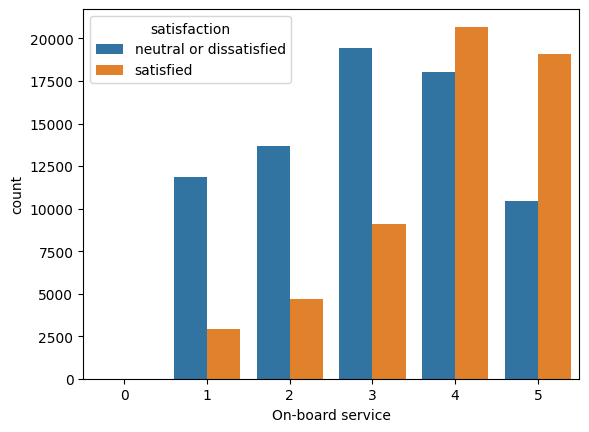

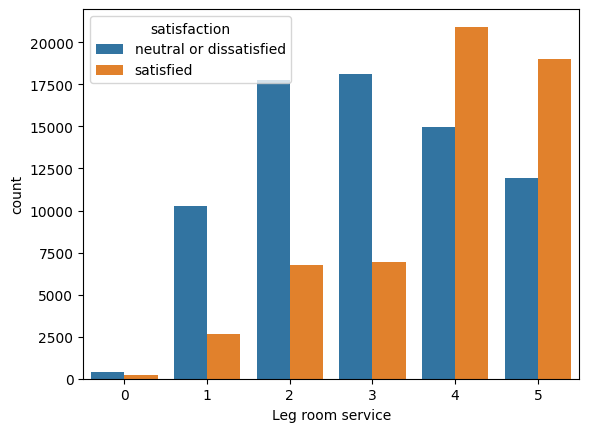

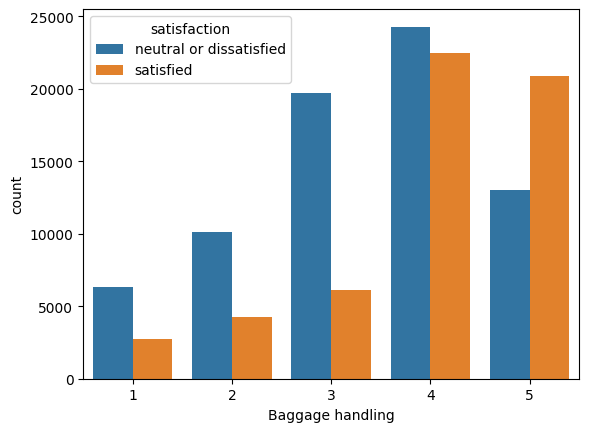

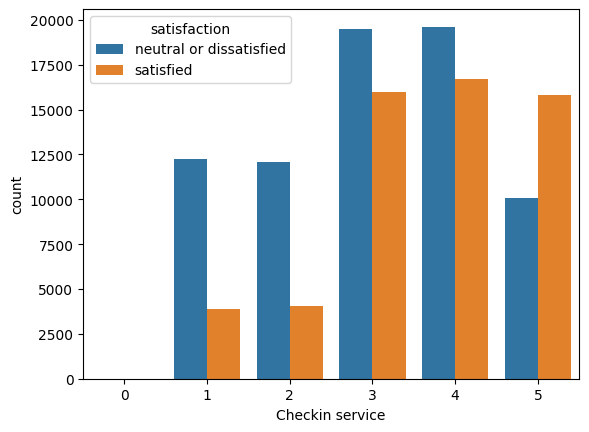

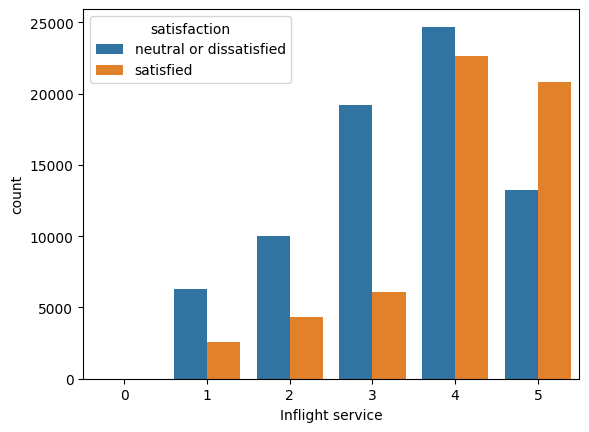

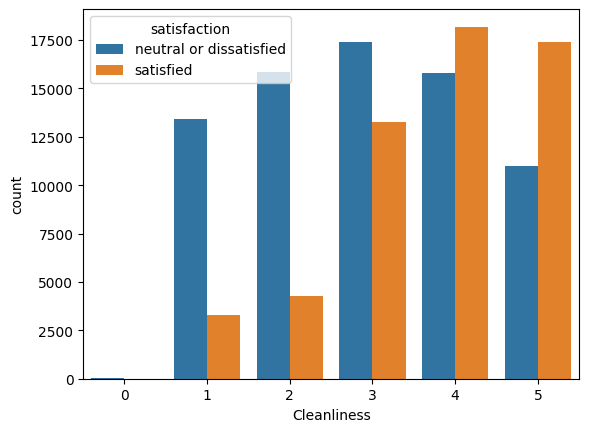

In [30]:
for column in df[satisfaction_features].columns:
    bar_df = df.groupby([column, 'satisfaction']).size().reset_index(name = 'count')
    sns.barplot(data = bar_df, x = column, y = 'count', hue = 'satisfaction')
    plt.show()

Gender  satisfaction           
Female  neutral or dissatisfied    37630
        satisfied                  28269
Male    neutral or dissatisfied    35822
        satisfied                  28159
dtype: int64


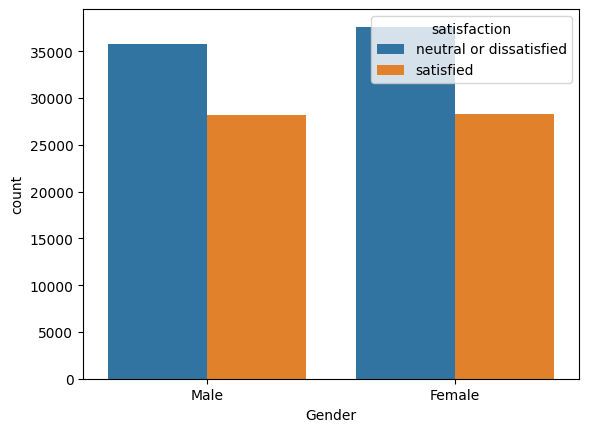

Customer Type      satisfaction           
Loyal Customer     neutral or dissatisfied    55372
                   satisfied                  50728
disloyal Customer  neutral or dissatisfied    18080
                   satisfied                   5700
dtype: int64


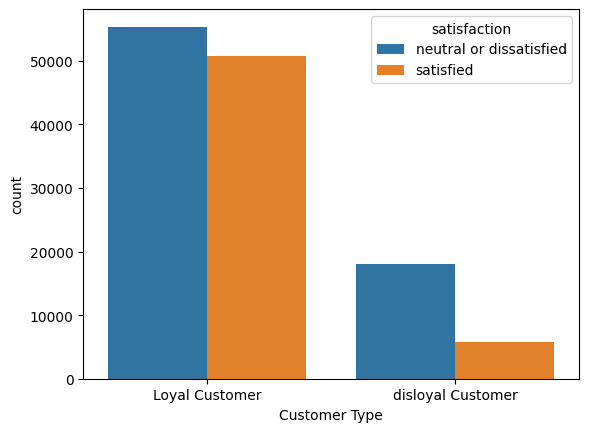

Type of Travel   satisfaction           
Business travel  neutral or dissatisfied    37337
                 satisfied                  52356
Personal Travel  neutral or dissatisfied    36115
                 satisfied                   4072
dtype: int64


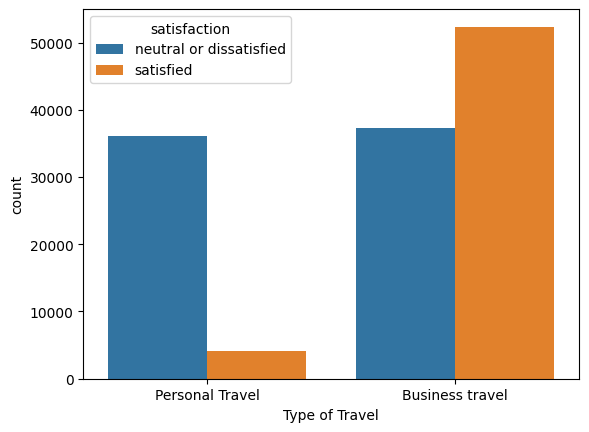

Class     satisfaction           
Business  neutral or dissatisfied    18994
          satisfied                  43166
Eco       neutral or dissatisfied    47366
          satisfied                  10943
Eco Plus  neutral or dissatisfied     7092
          satisfied                   2319
dtype: int64


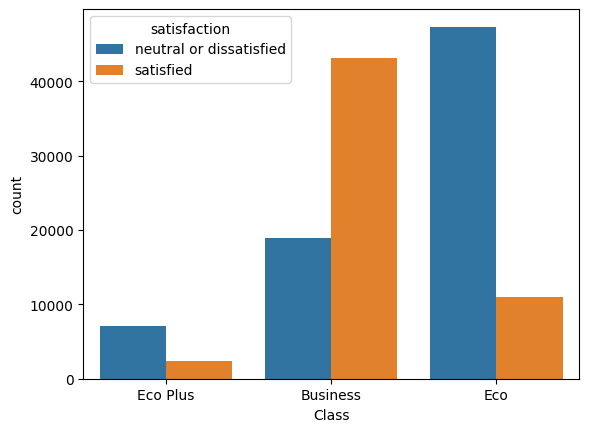

satisfaction             satisfaction           
neutral or dissatisfied  neutral or dissatisfied    73452
satisfied                satisfied                  56428
dtype: int64


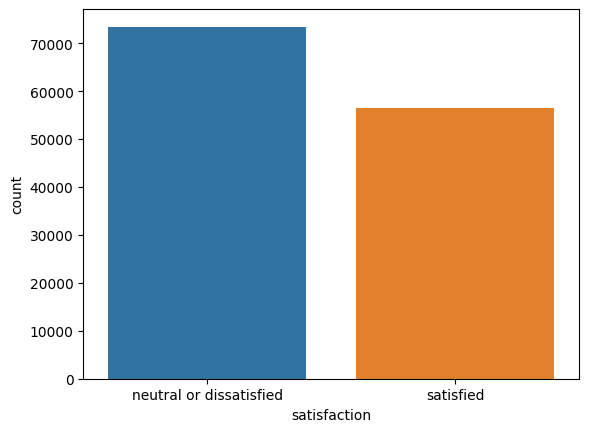

In [31]:
for x in df.select_dtypes(include = 'object').columns:
    print(df.groupby([x, 'satisfaction']).size())
    sns.countplot(data = df, x = x, hue = 'satisfaction')
    plt.show()

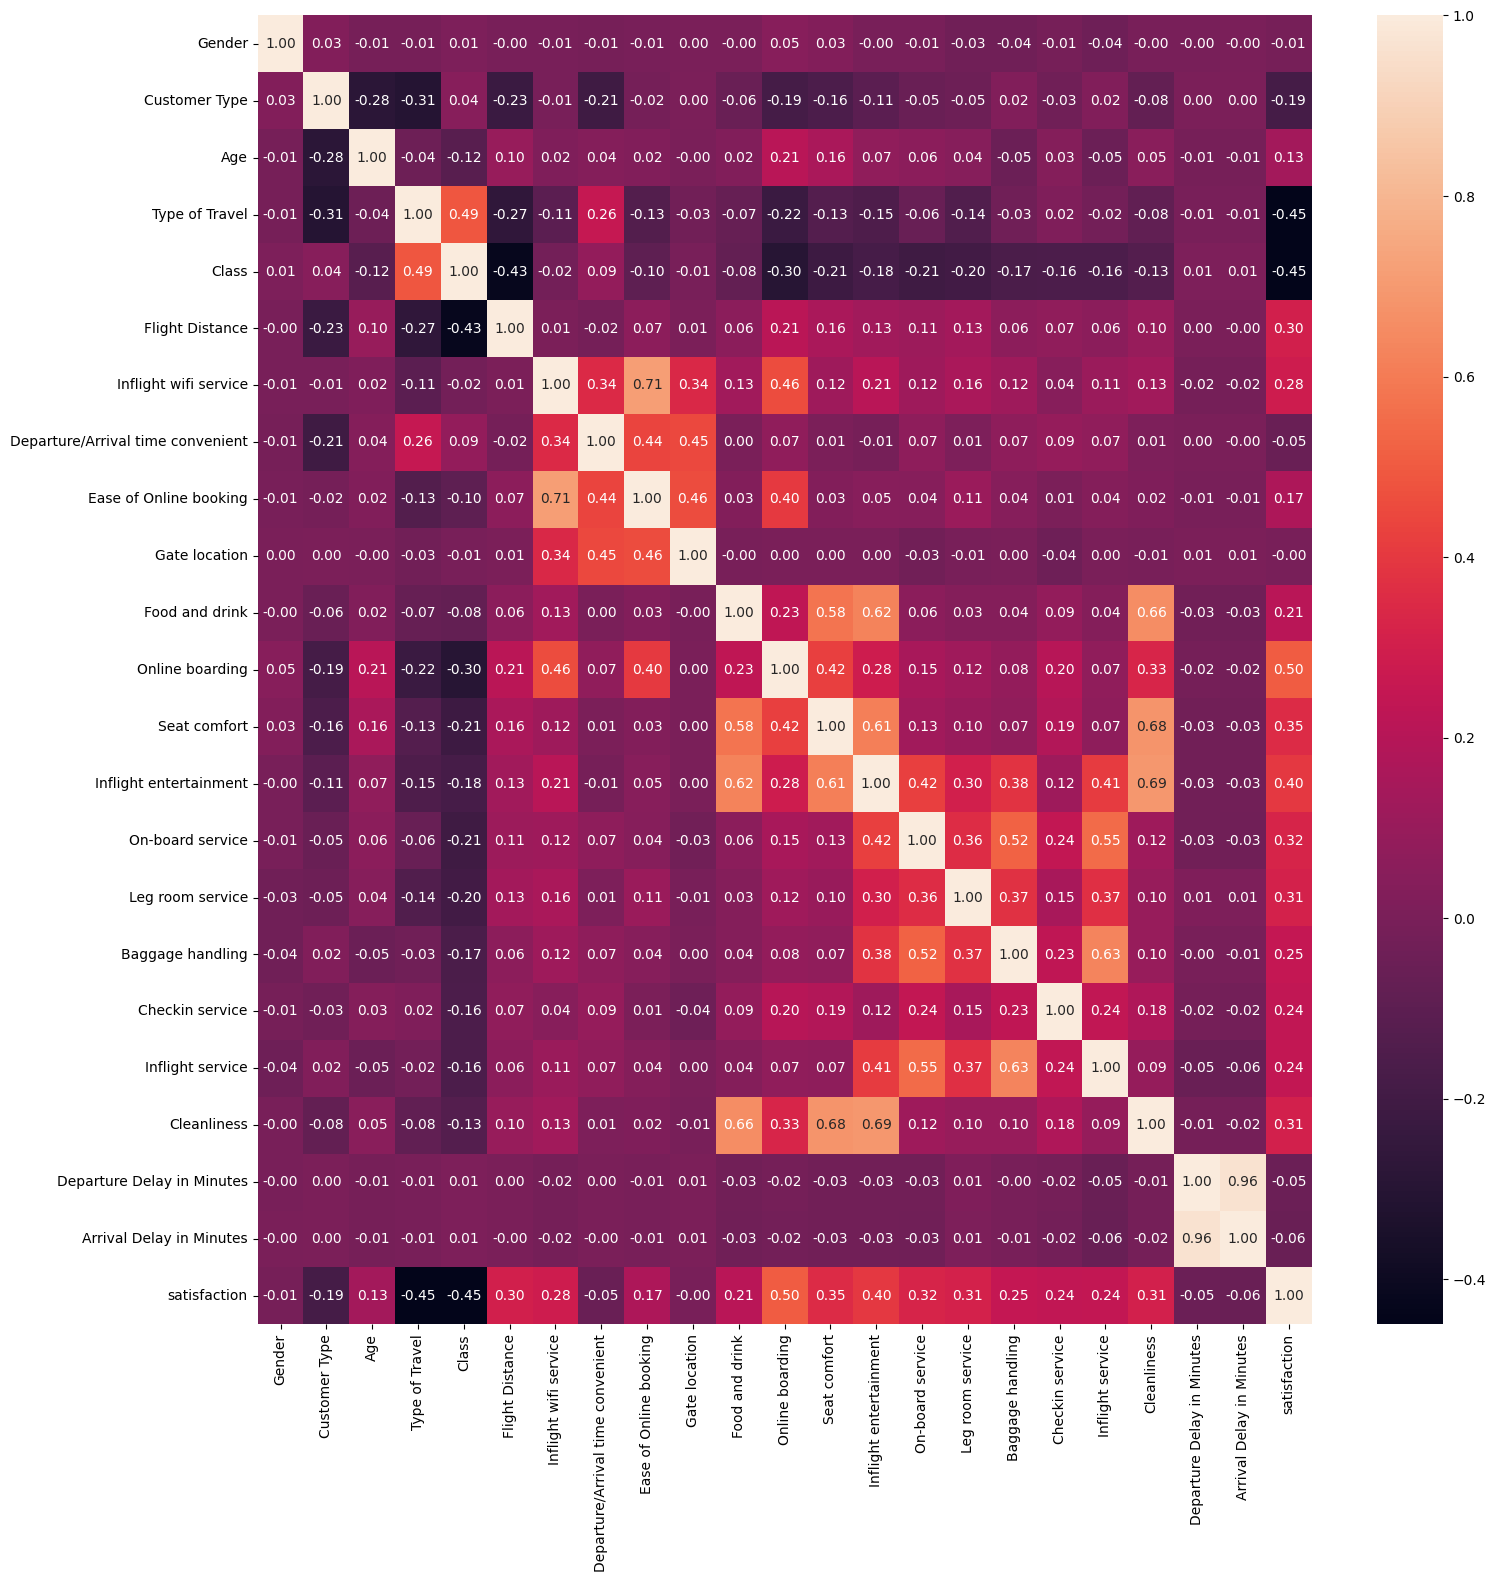

In [32]:
plt.figure(figsize = (17,17))
sns.heatmap(df_num.corr(), annot = True, fmt = '.2f')
plt.show()

In [33]:
corr_df = df_num.corr()
corr_df[corr_df > .60].count()

Gender                               1
Customer Type                        1
Age                                  1
Type of Travel                       1
Class                                1
Flight Distance                      1
Inflight wifi service                2
Departure/Arrival time convenient    1
Ease of Online booking               2
Gate location                        1
Food and drink                       3
Online boarding                      1
Seat comfort                         3
Inflight entertainment               4
On-board service                     1
Leg room service                     1
Baggage handling                     2
Checkin service                      1
Inflight service                     2
Cleanliness                          4
Departure Delay in Minutes           2
Arrival Delay in Minutes             2
satisfaction                         1
dtype: int64

In [34]:
df_num.shape

(129880, 23)

In [35]:
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1)
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [36]:
df_num = trimm_correlated(df_num, 0.70)
print(df_num.shape)

(129880, 21)


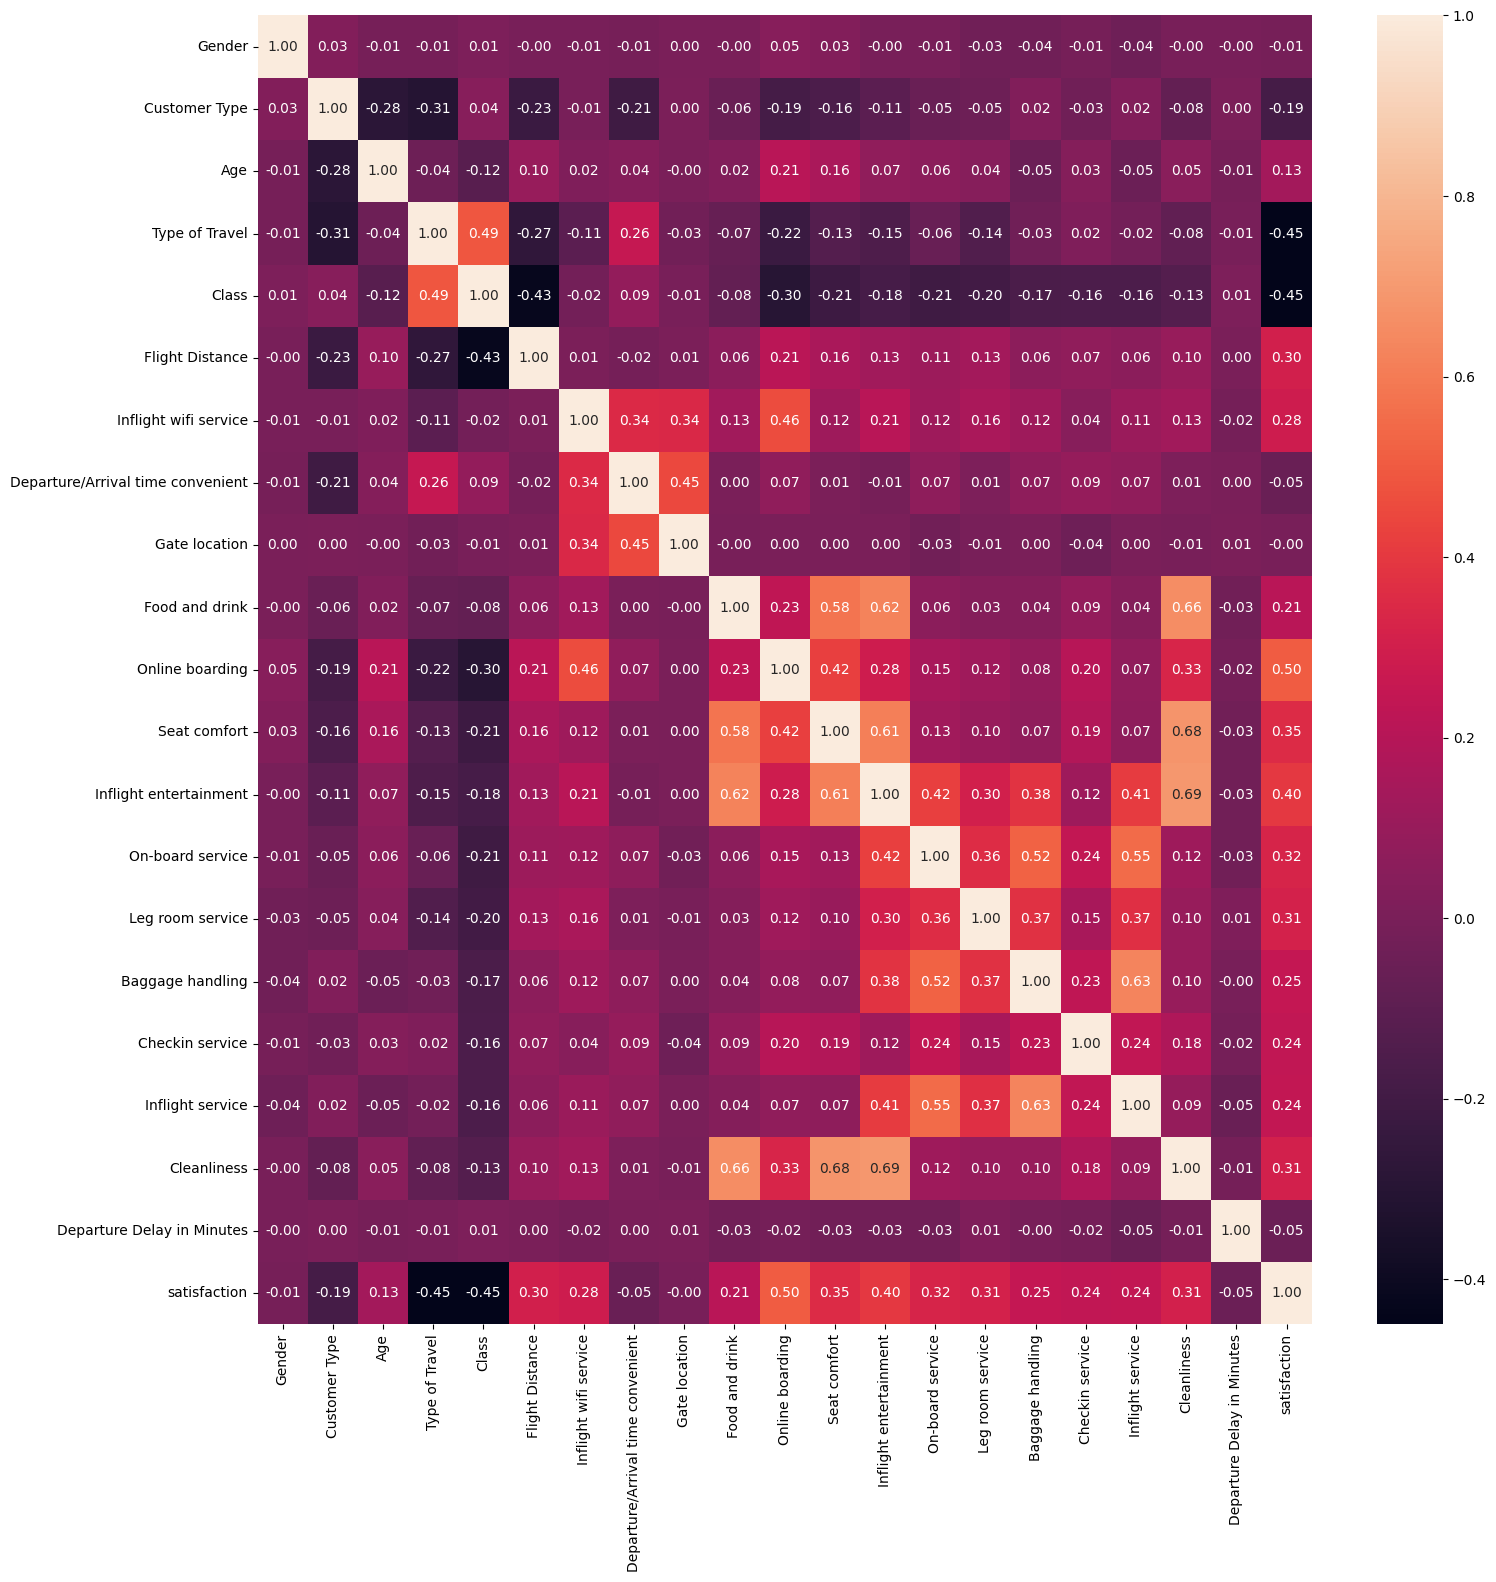

In [37]:
plt.figure(figsize = (17,17))
sns.heatmap(df_num.corr(), annot = True, fmt = '.2f')
plt.show()

In [38]:
df_num

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0.0,0.0,13.0,1.0,2.0,460.0,3.0,4.0,1.0,5.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,0.0
1,0.0,1.0,25.0,0.0,0.0,235.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,0.0
2,1.0,0.0,26.0,0.0,0.0,1142.0,2.0,2.0,2.0,5.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0
3,1.0,0.0,25.0,0.0,0.0,562.0,2.0,5.0,5.0,2.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,0.0
4,0.0,0.0,61.0,0.0,0.0,214.0,3.0,3.0,3.0,4.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.0,1.0,34.0,0.0,0.0,526.0,3.0,3.0,1.0,4.0,...,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0
129876,0.0,0.0,23.0,0.0,0.0,646.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,1.0
129877,1.0,0.0,17.0,1.0,1.0,828.0,2.0,5.0,5.0,2.0,...,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0
129878,0.0,0.0,14.0,0.0,0.0,1127.0,3.0,3.0,3.0,4.0,...,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,1.0


In [39]:
df_num.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.507384,0.183092,39.427957,0.309416,0.593864,1190.316392,2.728696,3.057599,2.976925,3.204774,...,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,0.434463
std,0.499947,0.386743,15.119360,0.462255,0.621378,997.452477,1.329340,1.526741,1.278520,1.329933,...,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,0.495688
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,0.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1.000000


In [40]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()
df_num = pd.DataFrame(vt.fit_transform(df_num.values), columns = df_num.columns)

In [41]:
df_num.shape

(129880, 21)

In [42]:
df_num

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0.0,0.0,13.0,1.0,2.0,460.0,3.0,4.0,1.0,5.0,...,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25.0,0.0
1,0.0,1.0,25.0,0.0,0.0,235.0,3.0,2.0,3.0,1.0,...,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1.0,0.0
2,1.0,0.0,26.0,0.0,0.0,1142.0,2.0,2.0,2.0,5.0,...,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0.0,1.0
3,1.0,0.0,25.0,0.0,0.0,562.0,2.0,5.0,5.0,2.0,...,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11.0,0.0
4,0.0,0.0,61.0,0.0,0.0,214.0,3.0,3.0,3.0,4.0,...,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.0,1.0,34.0,0.0,0.0,526.0,3.0,3.0,1.0,4.0,...,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0,0.0,0.0
129876,0.0,0.0,23.0,0.0,0.0,646.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,0.0,1.0
129877,1.0,0.0,17.0,1.0,1.0,828.0,2.0,5.0,5.0,2.0,...,2.0,2.0,4.0,3.0,4.0,5.0,4.0,2.0,0.0,0.0
129878,0.0,0.0,14.0,0.0,0.0,1127.0,3.0,3.0,3.0,4.0,...,4.0,4.0,3.0,2.0,5.0,4.0,5.0,4.0,0.0,1.0


In [43]:
x = df_num.drop('satisfaction', axis = 1)
continuous_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes']
discrete_features = [feature for feature in x.columns if feature not in continuous_features]


In [44]:
print(discrete_features)

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [45]:
onehot = OneHotEncoder(sparse_output=False)
onehot_data = pd.DataFrame(onehot.fit_transform(x[discrete_features]), columns = onehot.get_feature_names_out())



In [46]:
x= pd.concat([onehot_data, x[continuous_features]], axis = 1)


In [47]:
y = df_num['satisfaction']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [49]:
from sklearn.model_selection import GridSearchCV

In [69]:
class sklearn_model_build():
    def __init__(self, clf, params, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.clf = clf
        self.params = params
        self.grid_search = GridSearchCV(estimator=self.clf, param_grid=self.params, scoring='accuracy')
    def perform_grid_search(self):
        self.grid_search.fit(x_train, y_train)
        best_score = self.grid_search.best_score_
        best_params = self.grid_search.best_params_
        print('Best score:', best_score, '\n', 'Best Parameters:', best_params, '\n')
    def test_model(self):
        best_model = self.grid_search.best_estimator_
        test_predictions = best_model.predict(self.x_test)
        accuracy_score_test = accuracy_score(self.y_test, test_predictions)
        classification_report_test = classification_report(self.y_test, test_predictions)
        print('accuracy Score using testing data:', round(accuracy_score_test,3), '\n', 'classification report for testing data:','\n', classification_report_test)

In [70]:
param_logit = {'C': [0.001, 0.01, 1, 10],  'max_iter':[100, 1000] }
param_svm = {'C': [0.001, 0.01, 5, 10, 50, 100]}
param_knn = {'n_neighbors':[2,4,8,16]}
param_rf = {'n_estimators': [300, 500, 800], 'max_depth': [5,8,15]}
param_xg = {'eta': [0.01, 0.015, 0.025, 0.025, 0.05, 0.1], 'gamma': [0.05, 0.3, 0.5, 0.7, 0.9], 'min_child_weight': [1,3,5,7]}


In [71]:
logit = sklearn_model_build(LogisticRegression(), param_logit,x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test )

In [72]:
logit.perform_grid_search()

c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best score: 0.9324087469031157 
 Best Parameters: {'C': 1, 'max_iter': 1000} 



c:\Users\dgmur\python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
logit.test_model()

accuracy Score using testing data: 0.93 
 classification report for testing data: 
               precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     14664
         1.0       0.93      0.91      0.92     11312

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [73]:
knn = sklearn_model_build(KNeighborsClassifier(), param_knn,x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test )

In [74]:
knn.perform_grid_search()

Best score: 0.7189713131474811 
 Best Parameters: {'n_neighbors': 8} 



In [75]:
knn.test_model()

accuracy Score using testing data: 0.729 
 classification report for testing data: 
               precision    recall  f1-score   support

         0.0       0.73      0.84      0.78     14664
         1.0       0.73      0.59      0.65     11312

    accuracy                           0.73     25976
   macro avg       0.73      0.71      0.72     25976
weighted avg       0.73      0.73      0.72     25976



In [77]:
xgb = sklearn_model_build(XGBClassifier(), param_xg,x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test )

In [78]:
xgb.perform_grid_search()

Best score: 0.9607233550081075 
 Best Parameters: {'eta': 0.1, 'gamma': 0.9, 'min_child_weight': 1} 



In [79]:
xgb.test_model()

accuracy Score using testing data: 0.96 
 classification report for testing data: 
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     14664
         1.0       0.97      0.94      0.95     11312

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [80]:
rf = sklearn_model_build(RandomForestClassifier(), param_rf,x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test )

In [81]:
rf.perform_grid_search()

Best score: 0.9558823407904024 
 Best Parameters: {'max_depth': 15, 'n_estimators': 800} 



In [82]:
rf.test_model()

accuracy Score using testing data: 0.957 
 classification report for testing data: 
               precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     14664
         1.0       0.96      0.94      0.95     11312

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [91]:
import tensorflow 

input_1 = Input(shape = (x_train.shape[1],))
x = Dense(128, activation = 'relu')(input_1)
output_1 = Dense(1, activation = 'sigmoid')(x)

model_1 = Model(inputs = input_1, outputs = output_1)
model_1.compile(optimizer = tensorflow.keras.optimizers.Adam(), loss = tensorflow.keras.losses.BinaryCrossentropy(), metrics = ['accuracy', 'AUC'] )
model_1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 89)]              0         
                                                                 
 dense_12 (Dense)            (None, 128)               11520     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11649 (45.50 KB)


Trainable params: 11649 (45.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
model_1.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', mode= 'max', patience = 10, min_delta=0.001, restore_best_weights=True)])

Epoch 1/100
3247/3247 [==============================] - 2s 599us/step - loss: 0.1604 - accuracy: 0.9370 - auc: 0.9834 - val_loss: 0.1425 - val_accuracy: 0.9443 - val_auc: 0.9878
Epoch 2/100
3247/3247 [==============================] - 2s 581us/step - loss: 0.1563 - accuracy: 0.9386 - auc: 0.9841 - val_loss: 0.1380 - val_accuracy: 0.9458 - val_auc: 0.9883
Epoch 3/100
3247/3247 [==============================] - 2s 564us/step - loss: 0.1550 - accuracy: 0.9382 - auc: 0.9844 - val_loss: 0.1754 - val_accuracy: 0.9321 - val_auc: 0.9824
Epoch 4/100
3247/3247 [==============================] - 2s 565us/step - loss: 0.1476 - accuracy: 0.9409 - auc: 0.9857 - val_loss: 0.1323 - val_accuracy: 0.9466 - val_auc: 0.9893
Epoch 5/100
3247/3247 [==============================] - 2s 565us/step - loss: 0.1451 - accuracy: 0.9417 - auc: 0.9861 - val_loss: 0.1540 - val_accuracy: 0.9398 - val_auc: 0.9878
Epoch 6/100
3247/3247 [==============================] - 2s 565us/step - loss: 0.1406 - accuracy: 0.9439 

In [130]:
model_1_predictions = model_1.predict(x_test)>0.5
ann_accuracy = round(accuracy_score(y_test, model_1_predictions),3)
ann_classification_report = classification_report(y_test, model_1_predictions)
print(ann_accuracy, '\n', ann_classification_report)

812/812 [==============================] - 0s 308us/step
0.932 
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     14664
         1.0       0.97      0.87      0.92     11312

    accuracy                           0.93     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [96]:
import tensorflow 

input_2= Input(shape = (x_train.shape[1],))
x = Dense(256, activation = 'relu')(input_2)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
output_2 = Dense(1, activation = 'sigmoid')(x)

model_2 = Model(inputs = input_2, outputs = output_2)
model_2.compile(optimizer = tensorflow.keras.optimizers.Adam(), loss = tensorflow.keras.losses.BinaryCrossentropy(), metrics = ['accuracy', 'AUC'] )
model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 89)]              0         
                                                                 
 dense_14 (Dense)            (None, 256)               23040     
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 64257 (251.00 KB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
model_2.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', mode= 'max', patience = 10, min_delta=0.001, restore_best_weights=True)])

Epoch 1/100
3247/3247 [==============================] - 3s 829us/step - loss: 0.1220 - accuracy: 0.9490 - auc: 0.9897 - val_loss: 0.1135 - val_accuracy: 0.9519 - val_auc: 0.9912
Epoch 2/100
3247/3247 [==============================] - 3s 823us/step - loss: 0.1186 - accuracy: 0.9504 - auc: 0.9903 - val_loss: 0.1291 - val_accuracy: 0.9465 - val_auc: 0.9892
Epoch 3/100
3247/3247 [==============================] - 3s 801us/step - loss: 0.1179 - accuracy: 0.9509 - auc: 0.9904 - val_loss: 0.1381 - val_accuracy: 0.9435 - val_auc: 0.9886
Epoch 4/100
3247/3247 [==============================] - 3s 806us/step - loss: 0.1176 - accuracy: 0.9508 - auc: 0.9904 - val_loss: 0.1149 - val_accuracy: 0.9519 - val_auc: 0.9910
Epoch 5/100
3247/3247 [==============================] - 3s 786us/step - loss: 0.1175 - accuracy: 0.9509 - auc: 0.9904 - val_loss: 0.1090 - val_accuracy: 0.9550 - val_auc: 0.9917
Epoch 6/100
3247/3247 [==============================] - 3s 792us/step - loss: 0.1138 - accuracy: 0.9519 

In [128]:
model_2_predictions = (model_2.predict(x_test)> 0.5)
ann_accuracy_2 = round(accuracy_score(y_test, model_2_predictions),3)
ann_classification_report_2 = classification_report(y_test, model_2_predictions)
print(ann_accuracy_2, '\n', ann_classification_report_2)

812/812 [==============================] - 0s 446us/step
0.943 
               precision    recall  f1-score   support

         0.0       0.96      0.94      0.95     14664
         1.0       0.93      0.94      0.94     11312

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [131]:
input_3= Input(shape = (x_train.shape[1],))
x = Dense(512, activation = 'relu')(input_3)
x = Dense(384, activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x= Dense(32, activation = 'relu')(x)
output_3= Dense(1, activation = 'sigmoid')(x)

model_3 = Model(inputs = input_3, outputs = output_3)
model_3.compile(optimizer = tensorflow.keras.optimizers.Adam(), loss = tensorflow.keras.losses.BinaryCrossentropy(), metrics = ['accuracy', 'AUC'] )
model_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 89)]              0         
                                                                 
 dense_18 (Dense)            (None, 512)               46080     
                                                                 
 dense_19 (Dense)            (None, 384)               196992    
                                                                 
 dense_20 (Dense)            (None, 256)               98560     
                                                                 
 dense_21 (Dense)            (None, 128)               32896     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 32)                2080

In [134]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [139]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tensorflow.math.exp(-0.1)


In [142]:
model_3.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test), callbacks = [EarlyStopping(monitor='val_loss', mode= 'max', patience = 10, min_delta=0.001, restore_best_weights=True), LearningRateScheduler(scheduler)])

Epoch 1/100
3247/3247 [==============================] - 7s 2ms/step - loss: 0.0914 - accuracy: 0.9608 - auc: 0.9941 - val_loss: 0.1012 - val_accuracy: 0.9600 - val_auc: 0.9930 - lr: 2.2313e-04
Epoch 2/100
3247/3247 [==============================] - 7s 2ms/step - loss: 0.0906 - accuracy: 0.9612 - auc: 0.9941 - val_loss: 0.1033 - val_accuracy: 0.9595 - val_auc: 0.9930 - lr: 2.2313e-04
Epoch 3/100
3247/3247 [==============================] - 8s 2ms/step - loss: 0.0899 - accuracy: 0.9612 - auc: 0.9942 - val_loss: 0.1042 - val_accuracy: 0.9589 - val_auc: 0.9930 - lr: 2.2313e-04
Epoch 4/100
3247/3247 [==============================] - 7s 2ms/step - loss: 0.0893 - accuracy: 0.9614 - auc: 0.9943 - val_loss: 0.1167 - val_accuracy: 0.9562 - val_auc: 0.9919 - lr: 2.2313e-04
Epoch 5/100
3247/3247 [==============================] - 7s 2ms/step - loss: 0.0893 - accuracy: 0.9612 - auc: 0.9943 - val_loss: 0.1037 - val_accuracy: 0.9597 - val_auc: 0.9931 - lr: 2.2313e-04
Epoch 6/100
3247/3247 [=======

In [141]:
model_3_predictions = (model_3.predict(x_test)> 0.5)
ann_accuracy_3 = round(accuracy_score(y_test, model_3_predictions),3)
ann_classification_report_3 = classification_report(y_test, model_3_predictions)
print(ann_accuracy_2, '\n', ann_classification_report_3)

812/812 [==============================] - 1s 771us/step
0.943 
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     14664
         1.0       0.91      0.94      0.93     11312

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

